In [182]:
import pandas as pd
import zipfile
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import itertools
import matplotlib.dates as mdates

# 1. Préparation des données

In [148]:
# Dossier courant 
current_folder = os.getcwd()

# Lister tous les ZIP dans le dossier courant
zip_files = glob.glob(current_folder + "/*.zip")

# Dézipper seulement si le fichier n'existe pas déjà!
for z in zip_files:
    with zipfile.ZipFile(z, 'r') as zip_ref:
        for file_in_zip in zip_ref.namelist():
            output_path = os.path.join(current_folder, file_in_zip)

            # extraire seulement si le fichier n'existe pas
            if not os.path.exists(output_path):
                zip_ref.extract(file_in_zip, current_folder)
                print(f"Extracted: {file_in_zip}")
            else:
                print(f"Skipped (already exists): {file_in_zip}")

print("Extraction terminée :", current_folder)

Skipped (already exists): 202401-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202401-capitalbikeshare-tripdata.csv
Skipped (already exists): 202402-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202402-capitalbikeshare-tripdata.csv
Skipped (already exists): 202403-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202403-capitalbikeshare-tripdata.csv
Extracted: 202004-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202004-capitalbikeshare-tripdata.csv
Skipped (already exists): 202405-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202405-capitalbikeshare-tripdata.csv
Skipped (already exists): 202406-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202406-capitalbikeshare-tripdata.csv
Skipped (already exists): 202407-capitalbikeshare-tripdata.csv
Skipped (already exists): __MACOSX/._202407-capitalbikeshare-tripdata.csv
Skipped (already exists): 202408-capitalbikeshare-tripda

In [ ]:
# !! Renommer le CSV mal nommé d’avril 2024
os.rename("202004-capitalbikeshare-tripdata.csv", "202404-capitalbikeshare-tripdata.csv")

In [151]:
# Vérifier que tous les CSV sont bien là+ dans le bon ordre
csv_files = sorted(glob.glob(current_folder + "/*tripdata.csv"))
print(csv_files)
len(csv_files)

['C:\\Users\\kawta\\New_folder\\202401-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202402-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202403-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202404-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202405-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202406-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202407-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202408-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202409-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202410-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202411-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202412-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202501-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\New_folder\\202502-capitalbikeshare-tripdata.csv', 'C:\\Users\\kawta\\

24

In [152]:
columns_sets = [set(pd.read_csv(f, nrows=0).columns) for f in csv_files]
all_same = all(cols == columns_sets[0] for cols in columns_sets)
if all_same:
    print("Tous les fichiers ont exactement les mêmes colonnes.")

Tous les fichiers ont exactement les mêmes colonnes.


In [57]:
# Lire et concaténer tous les CSV
dfs = [pd.read_csv(f) for f in csv_files]
df_all = pd.concat(dfs, ignore_index=True)

print("Taille totale après concaténation :", df_all.shape)
df_all.head()

Taille totale après concaténation : (12776970, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519.0,4th & College St NW,31138.0,38.908643,-77.012365,38.921233,-77.018135,member
2,0536C9720F87E04C,classic_bike,2024-01-24 15:40:15,2024-01-24 15:43:55,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
3,9E17390C218783B5,classic_bike,2024-01-04 15:35:00,2024-01-04 15:37:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58,2024-01-05 12:35:40,1st & O St NW,31519.0,10th & G St NW,31274.0,38.908690,-77.012317,38.898243,-77.026235,casual


In [58]:
# Sauvegarder le fichier final concaténé pour ne pas refaire la concaténation 
final_csv = "df_all_2024_2025.csv"

if not os.path.exists(final_csv):
    df_all.to_csv(final_csv, index=False)
    print("Fichier concaténé sauvegardé :", final_csv)
else:
    print("Le fichier existe déjà :", final_csv)

Fichier concaténé sauvegardé : df_all_2024_2025.csv


# 2. Transformation en série temporelle

In [153]:
df_all = pd.read_csv('df_all_2024_2025.csv')

In [154]:
df_all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519.0,4th & College St NW,31138.0,38.908643,-77.012365,38.921233,-77.018135,member
2,0536C9720F87E04C,classic_bike,2024-01-24 15:40:15,2024-01-24 15:43:55,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
3,9E17390C218783B5,classic_bike,2024-01-04 15:35:00,2024-01-04 15:37:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58,2024-01-05 12:35:40,1st & O St NW,31519.0,10th & G St NW,31274.0,38.908690,-77.012317,38.898243,-77.026235,casual


In [155]:
# Convertir started_at en datetime (pour manipuler les dates et heures)
df_all['started_at'] = pd.to_datetime(df_all['started_at'])

In [156]:
# Mettre started_at comme index (pour faciliter le resampling temporel)
df_all.set_index('started_at', inplace=True)

# Compter le nombre de trajets par heure
df_hourly = df_all.resample('H').size().to_frame(name='num_rides')

In [157]:
df_hourly.head()

,num_rides
started_at,
2024-01-01 00:00:00,272
2024-01-01 01:00:00,324
2024-01-01 02:00:00,237
2024-01-01 03:00:00,60
2024-01-01 04:00:00,26


In [158]:
# Ajouter des features temporelles (en vue d'enrichir notre dataset)
df_hourly['weekday'] = df_hourly.index.weekday        # 0 = lundi, 6 = dimanche
df_hourly['is_weekend'] = df_hourly['weekday'] >= 5  # True si samedi ou dimanche
df_hourly['hour'] = df_hourly.index.hour             # Heure de la journée (0-23)

In [159]:
# Définir les jours fériés US connus à l’avance
us_holidays = [
    '2024-01-01','2024-05-27','2024-07-04','2024-09-02','2024-11-28','2024-12-25',
    '2025-01-01','2025-05-26','2025-07-04','2025-09-01','2025-11-27','2025-12-25'
]

df_hourly['is_holiday'] = df_hourly.index.strftime('%Y-%m-%d').isin(us_holidays)

# Nouvelle feature : type de holiday 
holiday_types = {
    '2024-01-01': 'new_year',
    '2024-05-27': 'memorial_day',
    '2024-07-04': 'independence_day',
    '2024-09-02': 'labor_day',
    '2024-11-28': 'thanksgiving',
    '2024-12-25': 'christmas',
    '2025-01-01': 'new_year',
    '2025-05-26': 'memorial_day',
    '2025-07-04': 'independence_day',
    '2025-09-01': 'labor_day',
    '2025-11-27': 'thanksgiving',
    '2025-12-25': 'christmas'
}

# Mapper chaque date à son type de holiday, ou 'none' si ce n'est pas un jour férié
df_hourly['holiday_type'] = df_hourly.index.strftime('%Y-%m-%d').map(
    lambda x: holiday_types.get(x, 'none'))

In [160]:
# Vérification rapide
df_hourly.head()

,num_rides,weekday,is_weekend,hour,is_holiday,holiday_type
started_at,,,,,,
2024-01-01 00:00:00,272,0,False,0,True,new_year
2024-01-01 01:00:00,324,0,False,1,True,new_year
2024-01-01 02:00:00,237,0,False,2,True,new_year
2024-01-01 03:00:00,60,0,False,3,True,new_year
2024-01-01 04:00:00,26,0,False,4,True,new_year


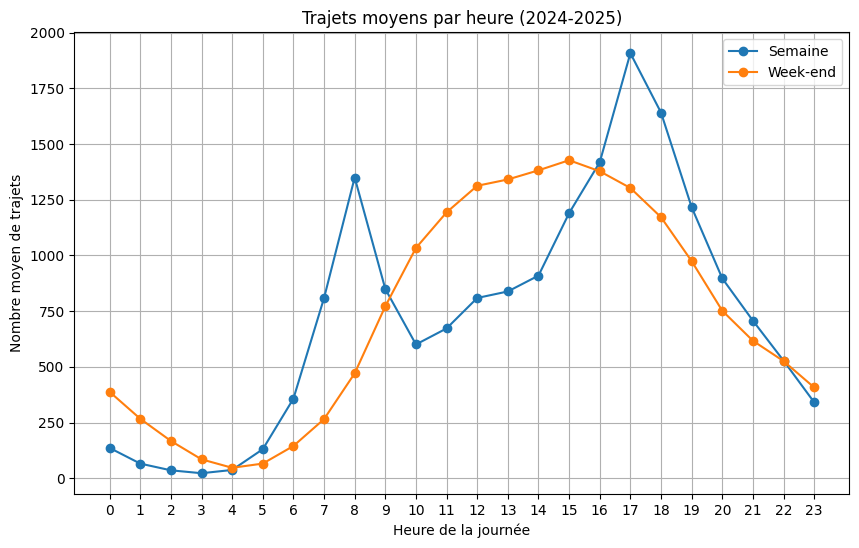

In [161]:
# Création de deux séries : semaine vs week-end
weekday_rides = df_hourly[df_hourly['is_weekend'] == False].groupby('hour')['num_rides'].mean()
weekend_rides = df_hourly[df_hourly['is_weekend'] == True].groupby('hour')['num_rides'].mean()

plt.figure(figsize=(10,6))
plt.plot(weekday_rides.index, weekday_rides.values, marker='o', label='Semaine')
plt.plot(weekend_rides.index, weekend_rides.values, marker='o', label='Week-end')

plt.title("Trajets moyens par heure (2024-2025)")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre moyen de trajets")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend()
plt.show()

# 3. Choix de la baseline naïve

La visualisation des trajets moyens par heure montre clairement que :

- En semaine, il y a deux pics principaux : **le matin (≈8h)** et **le soir (≈17h)**.  
- Le week-end, les trajets sont plus étalés dans la journée, avec un pic en milieu d’après-midi.

Ces patterns horaires très réguliers suggèrent qu’une **baseline simple à horizon 24h** peut déjà capturer **une partie importante de la demande**.

**Hypothèse :** le nombre de trajets à une heure donnée sera **similaire à celui de la même heure la veille**.  
- Horizon choisi : **24h**, pertinent pour un opérateur planifiant la flotte pour le jour suivant.  
- Cette baseline servira de **référence initiale**, avant de tester des modèles plus avancés avec features supplémentaires.

**Note** : cette baseline naïve ne tient compte que de l’inertie horaire (H-24), 
les features week-end ou jours fériés seront utilisées dans les baselines suivantes.

In [179]:
# Définir l'horizon
horizon = 24  # prédiction 24h plus tard

#  Split temporel strict
# Train = toute l'année 2024, Test = toute l'année 2025
train = df_hourly[df_hourly.index.year == 2024].copy()
test  = df_hourly[df_hourly.index.year == 2025].copy()

# Appliquer la baseline naïve H-24 
train['naive_h24'] = train['num_rides'].shift(horizon)
test['naive_h24']  = test['num_rides'].shift(horizon)

# Pour la première valeur du test, utiliser la dernière valeur connue du train si NaN 
if pd.isna(test['naive_h24'].iloc[0]):
    test.loc[test.index[0], 'naive_h24'] = train['num_rides'].iloc[-horizon]

# Supprimer les NaN restants (au début du train et éventuellement en test) 
train_eval = train.dropna(subset=['naive_h24'])
test_eval  = test.dropna(subset=['naive_h24'])

# Calculer les métriques sur le test (simulation du futur) 
# sMAPE : erreur relative symétrique en pourcentage, stable même si certaines valeurs sont proches de 0
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# MAE: erreur absolue moyenne en nombre de trajets
mae_naive = mean_absolute_error(test_eval['num_rides'], test_eval['naive_h24'])
smape_naive = smape(test_eval['num_rides'], test_eval['naive_h24'])

print(f" 🎯Baseline naïve H-24 : MAE = {mae_naive:.2f}, sMAPE = {smape_naive:.2f}%")


 🎯Baseline naïve H-24 : MAE = 194.83, sMAPE = 33.88%


In [163]:
df_hourly.head()

,num_rides,weekday,is_weekend,hour,is_holiday,holiday_type
started_at,,,,,,
2024-01-01 00:00:00,272,0,False,0,True,new_year
2024-01-01 01:00:00,324,0,False,1,True,new_year
2024-01-01 02:00:00,237,0,False,2,True,new_year
2024-01-01 03:00:00,60,0,False,3,True,new_year
2024-01-01 04:00:00,26,0,False,4,True,new_year


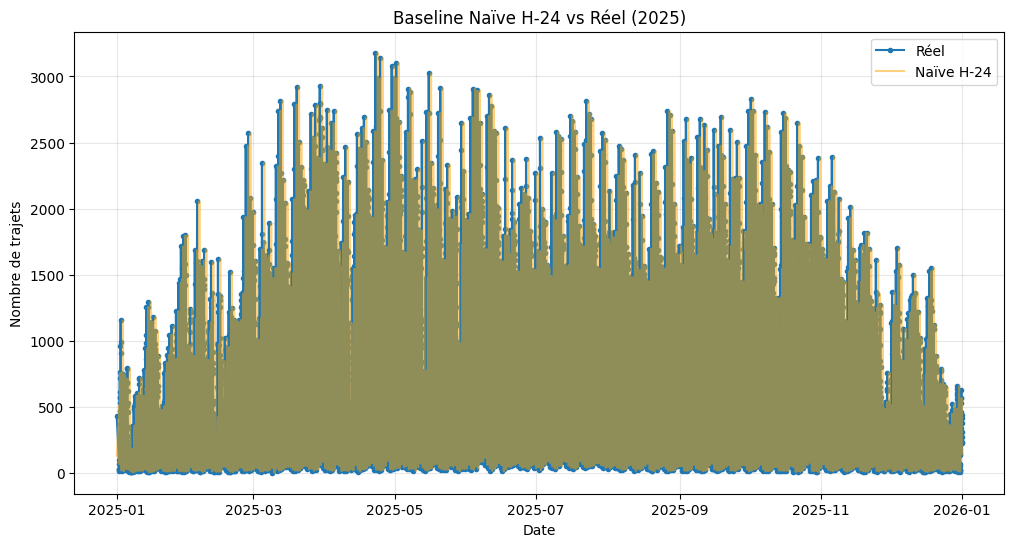

In [164]:
#  Graphique sur l'année complète ---
plt.figure(figsize=(12,6))
plt.plot(test_eval.index, test_eval['num_rides'], label='Réel', marker='o', markersize=3)
plt.plot(test_eval.index, test_eval['naive_h24'], label='Naïve H-24', color='orange', alpha=0.5)
plt.title("Baseline Naïve H-24 vs Réel (2025)")
plt.xlabel("Date")
plt.ylabel("Nombre de trajets")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Interprétation de la baseline naïve H‑24 à l’échelle annuelle
À l’échelle annuelle, la baseline naïve H-24 suit correctement la tendance globale de la demande réelle, capturant la saisonnalité ainsi que les cycles hebdomadaires et journaliers.
Les courbes apparaissent largement **superposées**, confirmant une forte auto-corrélation de la demande à 24 heures.
Toutefois, cette vue agrégée masque les **erreurs locales** et ne permet pas d’évaluer précisément la qualité de prédiction sur les variations fines. 

==> C’est pourquoi on fait ensuite un zoom sur une semaine pour mieux analyser les écarts.

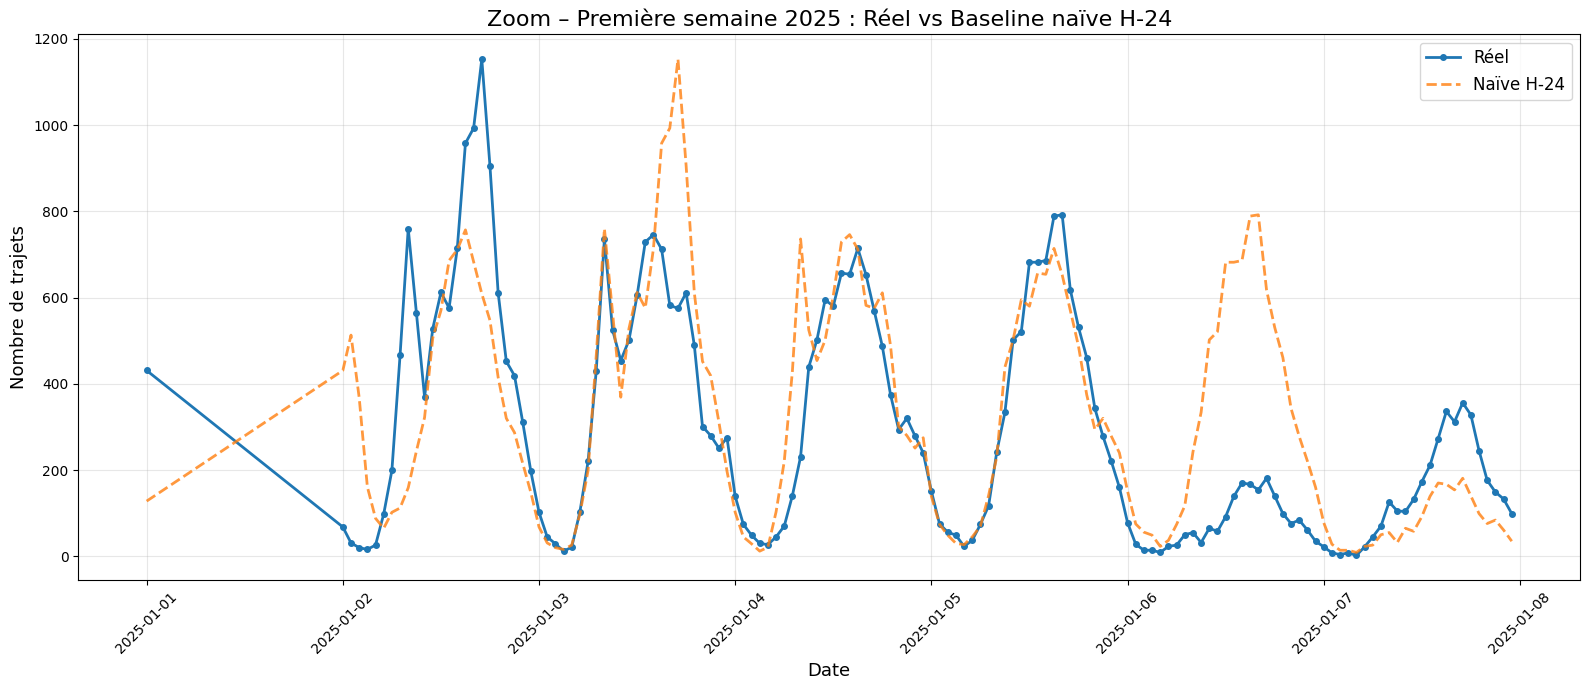

In [165]:
#  Zoom sur la première semaine de 2025
zoom_start = '2025-01-01'
zoom_end   = '2025-01-07 23:00:00'  # fin de journée incluse (horaire)

test_zoom = test_eval.loc[zoom_start:zoom_end]

# Tracé du zoom
plt.figure(figsize=(16,7))

plt.plot(
    test_zoom.index,
    test_zoom['num_rides'],
    label='Réel',
    linewidth=2,
    marker='o',
    markersize=4
)
plt.plot(
    test_zoom.index,
    test_zoom['naive_h24'],
    label='Naïve H-24',
    linestyle='--',
    linewidth=2,
    alpha=0.8
)

plt.title("Zoom – Première semaine 2025 : Réel vs Baseline naïve H-24", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Nombre de trajets", fontsize=13)

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Interprétation du zoom sur la première semaine de la baseline naïve H‑24:
Le zoom sur la première semaine de 2025 montre que la baseline naïve H-24 reproduit correctement la structure horaire de la demande, avec des profils journaliers proches de la série réelle.
Toutefois, des écarts d’amplitude marqués apparaissent lors de transitions entre journées consécutives présentant des niveaux de demande différents, notamment le 6 janvier (Lundi) , où la demande est nettement surestimée.
Ces écarts illustrent une limite intrinsèque de la baseline H-24, qui repose sur l’hypothèse d’une stabilité du niveau de demande d’un jour à l’autre.

# 4. Amélioration  – Baseline 2

Afin de corriger les écarts observés sur la baseline naïve H-24, notamment lors des transitions entre journées consécutives présentant des niveaux de demande différents, une baseline améliorée a été introduite.
Celle-ci combine **la prédiction H-24 avec une moyenne historique par jour de la semaine et par heure** , calculée uniquement sur les données d’entraînement.

In [176]:
# Pour éviter toute fuite d’information(data leakage),le modèle est évalué en conditions réelles :
#- Train : année 2024
#- Validation : fin 2024 (tuning des paramètres)
#- Test : année 2025 (véritable futur hors échantillon)

train_2024 = train[train.index < '2024-11-01'].copy()
val_2024   = train[train.index >= '2024-11-01'].copy()

# Correction première valeur validation: on utilise la dernière valeur connue du train
if pd.isna(val_2024['naive_h24'].iloc[0]):
    val_2024.loc[val_2024.index[0], 'naive_h24'] = train_2024['num_rides'].iloc[-horizon]

# Calcul de la moyenne saisonnière par jour de la semaine et heure,UNIQUEMENT sur train
# Moyenne saisonnière : moyenne de toutes les valeurs observées pour une même 
# combinaison jour de la semaine et heure (ex : tous les lundis à 8h)

mean_by_day_hour = train_2024.groupby(
    [train_2024.index.weekday, train_2024.index.hour])['num_rides'].mean()

# Grid Search sur VALIDATION pour trouver le meilleur alpha (poids entre H-24 et saisonnalité)
alphas = np.arange(0.4, 0.95, 0.05)
results = []

for alpha in alphas:
    val_2024['baseline2_tmp'] = val_2024.apply(
        lambda row: alpha * mean_by_day_hour.loc[(row.name.weekday(), row.name.hour)] +
                    (1 - alpha) * row['naive_h24'],
        axis=1)

    df_eval_val = val_2024.dropna(subset=['baseline2_tmp'])

    mae = mean_absolute_error(df_eval_val['num_rides'], df_eval_val['baseline2_tmp'])
    smape_val = smape(df_eval_val['num_rides'], df_eval_val['baseline2_tmp'])

    results.append((alpha, mae, smape_val))

best_alpha, best_mae, best_smape = min(results, key=lambda x: x[1])

print(f"\n ✨Meilleur alpha (validation) : {best_alpha:.2f}")
print(f"Validation → MAE={best_mae:.2f}, sMAPE={best_smape:.2f}%")


 ✨Meilleur alpha (validation) : 0.40
Validation → MAE=163.23, sMAPE=30.64%


Le paramètre optimal α = 0.40 met en évidence un compromis équilibré entre inertie temporelle et comportement saisonnier moyen.
La prédiction reste majoritairement guidée par **l’historique récent (60%)**, tout en étant corrigée par un profil typique du jour et de l’heure, améliorant ainsi la robustesse du modèle.

In [178]:
# Application finale sur TEST 2025

test['baseline2'] = test.apply(
    lambda row: best_alpha * mean_by_day_hour.loc[(row.name.weekday(), row.name.hour)] +
                (1 - best_alpha) * row['naive_h24'],
    axis=1
)

df_eval_test = test.dropna(subset=['baseline2'])

mae_test = mean_absolute_error(df_eval_test['num_rides'], df_eval_test['baseline2'])
smape_test = smape(df_eval_test['num_rides'], df_eval_test['baseline2'])

print(f"\n🎯Performance finale sur test 2025 :")
print(f"MAE = {mae_test:.2f}")
print(f"sMAPE = {smape_test:.2f}%")



🎯Performance finale sur test 2025 :
MAE = 174.09
sMAPE = 29.22%


La baseline améliorée permet une réduction significative de l’erreur par rapport à la baseline naïve H-24, avec une MAE passant de 194.83 à 174.09 trajets par heure et une sMAPE de 33.88% à 29.22% sur l’année 2025.
Cette amélioration démontre l’apport d’une information structurelle simple (jour de la semaine et heure) pour corriger les biais observés lors des changements de régime d’un jour à l’autre.

#### Remarque:
La baseline naïve ne nécessite pas de validation car elle ne comporte aucun hyperparamètre.
En revanche, dès que j’introduis des paramètres optimisables (alpha ou pondérations), j’introduis un risque d’overfitting.
J’ai donc ajouté un split validation sur fin 2024 afin de sélectionner les paramètres sans regarder 2025, qui reste un véritable test hors échantillon.

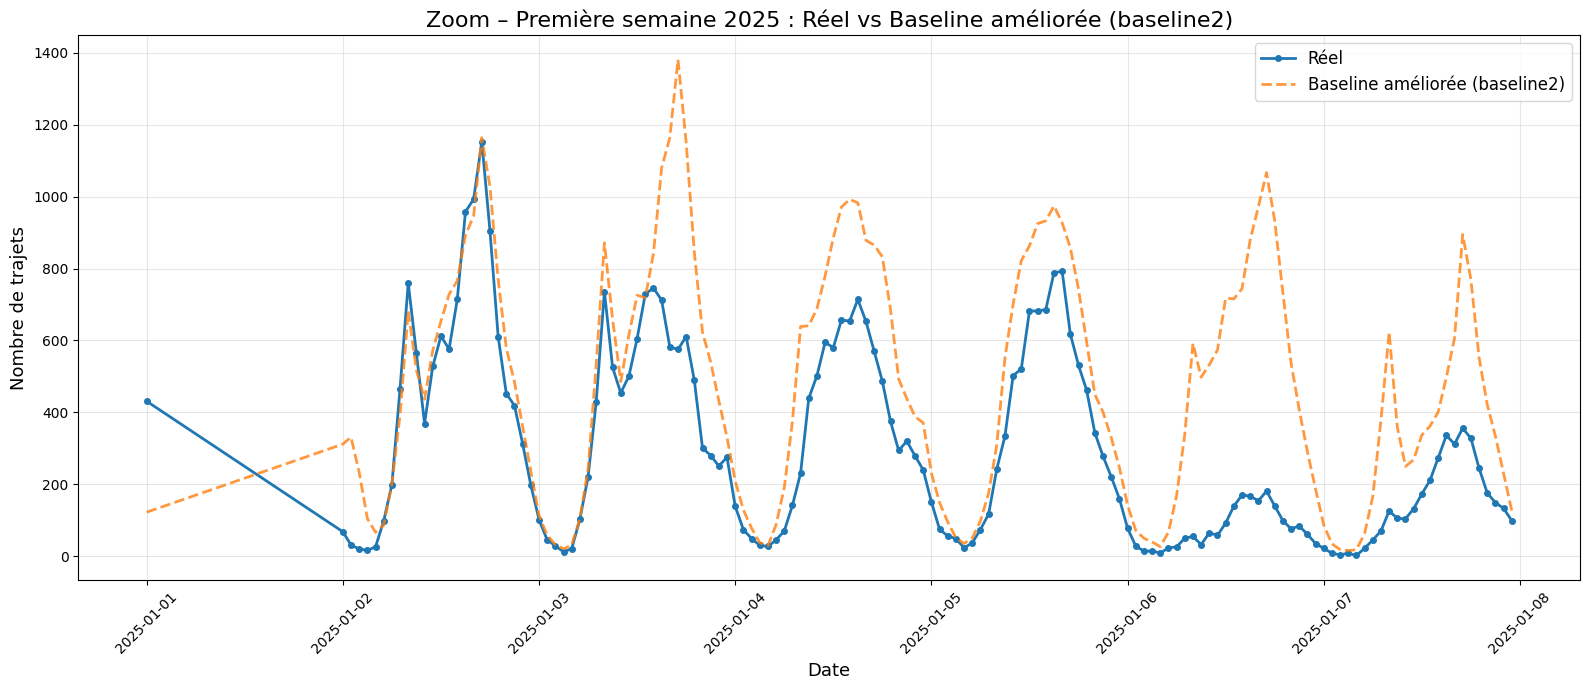

In [168]:
# Zoom sur la première semaine de 2025 
zoom_start = '2025-01-01'
zoom_end   = '2025-01-07 23:00:00'  # journée complète (horaire)

test_zoom_b2 = df_eval_test.loc[zoom_start:zoom_end]

# Tracé du zoom 
plt.figure(figsize=(16,7))

plt.plot(
    test_zoom_b2.index,
    test_zoom_b2['num_rides'],
    label='Réel',
    linewidth=2,
    marker='o',
    markersize=4
)

plt.plot(
    test_zoom_b2.index,
    test_zoom_b2['baseline2'],
    label='Baseline améliorée (baseline2)',
    linestyle='--',
    linewidth=2,
    alpha=0.8
)

plt.title(
    "Zoom – Première semaine 2025 : Réel vs Baseline améliorée (baseline2)",
    fontsize=16
)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Nombre de trajets", fontsize=13)

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Interprétation du zoom sur la première semaine de la baseline 2: 
Visuellement, la baseline améliorée capture correctement la saisonnalité journalière et le timing des pics, mais tend à surestimer leur amplitude, en particulier lors des périodes de forte activité.
La baseline améliorée apporte donc un gain structurel mais souffre d’une sur-estimation systématique des pics.

# 5. Amélioration finale – Baseline 3
Cette baseline constitue l’itération finale du POV.
Elle combine plusieurs sources d’information pour prédire le nombre de trajets :  
- **H-24** : valeur à la même heure la veille (inertie quotidienne)  
- **Saisonnalité** : moyenne historique pour chaque jour de la semaine et heure (profil typique)  
- **Rolling 3h** : moyenne des 3 dernières heures pour capturer l’inertie locale à court terme  
- **Calendrier** : ajustements pour week-ends et jours fériés  

L’idée est de créer une prédiction robuste en combinant historique, saison et effet immédiat du passé récent.

In [173]:
# BASELINE 3 — H24 + saisonnalité + rolling 3h + calendrier

# Rolling moyenne causale des 3 dernières heures (train, val, test) pour capturer l’inertie locale
for df in [train_2024, val_2024, test]:
    df['mean_last3h'] = df['num_rides'].shift(1).rolling(3).mean()

# Grid search sur VALIDATION pour trouver les poids optimaux
hist_values = np.arange(0.3, 0.71, 0.05)   # poids saisonnalité
h24_values  = np.arange(0.2, 0.51, 0.05)  # poids H-24

best_score = float('inf')
best_weights = None

for h, h24 in itertools.product(hist_values, h24_values):
    last3 = 1 - h - h24
    if last3 < 0:
        continue

    baseline_tmp = (
        h * val_2024.apply(lambda r: mean_by_day_hour.loc[(r['weekday'], r['hour'])], axis=1) +
        h24 * val_2024['naive_h24'] +
        last3 * val_2024['mean_last3h'].fillna(val_2024['naive_h24'])
    )

    y_true = val_2024['num_rides']
    mae_val = mean_absolute_error(y_true, baseline_tmp)
    smape_val = smape(y_true, baseline_tmp)
    score = 0.7 * mae_val + 0.3 * smape_val

    if score < best_score:
        best_score = score
        best_weights = (h, h24, last3)

h, h24, last3 = best_weights
print(f" ✨Meilleure combinaison (validation)")
print(f"historique={h:.2f}, H24={h24:.2f}, last3h={last3:.2f}")

# Calcul des holiday et weekend factors à partir du TRAIN
normal_mean_train = train_2024[train_2024['holiday_type'] == 'none']['num_rides'].mean()
holiday_factors_train = train_2024.groupby('holiday_type')['num_rides'].mean() / normal_mean_train
holiday_factors_train['none'] = 1.0

weekday_mean_train = train_2024[train_2024['is_weekend']==False]['num_rides'].mean()
weekend_mean_train = train_2024[train_2024['is_weekend']==True]['num_rides'].mean()
weekend_factor_train = weekend_mean_train / weekday_mean_train

# Appliquer Baseline3 sur VALIDATION
val_2024['baseline3'] = (
    h * val_2024.apply(lambda r: mean_by_day_hour.loc[(r['weekday'], r['hour'])], axis=1) +
    h24 * val_2024['naive_h24'] +
    last3 * val_2024['mean_last3h'].fillna(val_2024['naive_h24'])
) * val_2024['holiday_type'].map(holiday_factors_train).fillna(1.0) \
  * val_2024['is_weekend'].apply(lambda x: weekend_factor_train if x else 1.0)

# Évaluation sur VALIDATION
mae_val_final = mean_absolute_error(val_2024['num_rides'], val_2024['baseline3'])
smape_val_final = smape(val_2024['num_rides'], val_2024['baseline3'])
print(f" Baseline 3 – Validation 2024")
print(f"MAE   : {mae_val_final:.2f}")
print(f"sMAPE : {smape_val_final:.2f}%")

# Appliquer Baseline3 sur TEST
test['baseline3'] = (
    h * test.apply(lambda r: mean_by_day_hour.loc[(r['weekday'], r['hour'])], axis=1) +
    h24 * test['naive_h24'] +
    last3 * test['mean_last3h'].fillna(test['naive_h24'])
) * test['holiday_type'].map(holiday_factors_train).fillna(1.0) \
  * test['is_weekend'].apply(lambda x: weekend_factor_train if x else 1.0)

# Évaluation sur TEST
df_eval_test = test.dropna(subset=['baseline3'])
mae_b3 = mean_absolute_error(df_eval_test['num_rides'], df_eval_test['baseline3'])
smape_b3 = smape(df_eval_test['num_rides'], df_eval_test['baseline3'])

print(f" 🎯 Baseline 3 – Test 2025")
print(f"MAE   : {mae_b3:.2f}")
print(f"sMAPE : {smape_b3:.2f}%")

 ✨Meilleure combinaison (validation)
historique=0.30, H24=0.50, last3h=0.20
 Baseline 3 – Validation 2024
MAE   : 153.11
sMAPE : 30.76%
 🎯 Baseline 3 – Test 2025
MAE   : 165.33
sMAPE : 29.93%


 La meilleure combinaison de Baseline 3 **(historique=0.30, H-24=0.50, last3h=0.20)** donne une bonne performance sur validation 2024 (MAE=153.11, sMAPE=30.76%) et reste stable sur le test 2025 (MAE=165.33, sMAPE=29.93%), montrant une **généralisation cohérente.**

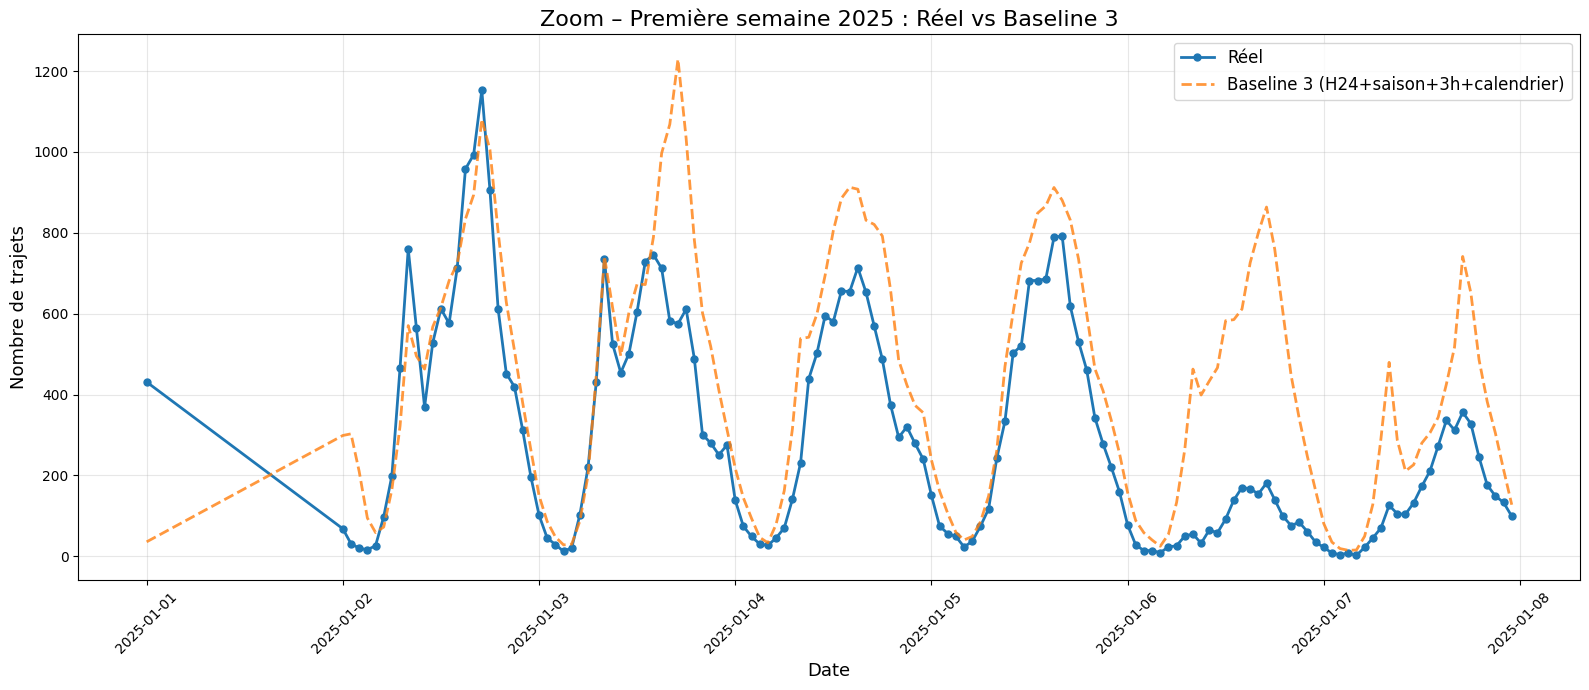

In [170]:
# Définir période de zoom
zoom_start = '2025-01-01'
zoom_end   = '2025-01-07 23:00:00'

# Sélection des données
test_zoom_b3 = df_eval_test.loc[zoom_start:zoom_end]

# S'assurer que l'index est datetime
test_zoom_b3.index = pd.to_datetime(test_zoom_b3.index)

# Plot
plt.figure(figsize=(16,7))
plt.plot(
    test_zoom_b3.index,
    test_zoom_b3['num_rides'],
    label='Réel',
    linewidth=2,
    marker='o',
    markersize=5
)
plt.plot(
    test_zoom_b3.index,
    test_zoom_b3['baseline3'],
    label='Baseline 3 (H24+saison+3h+calendrier)',
    linestyle='--',
    linewidth=2,
    alpha=0.8
)

plt.title("Zoom – Première semaine 2025 : Réel vs Baseline 3", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Nombre de trajets", fontsize=13)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Formatter l'axe x pour avoir un tick par jour
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

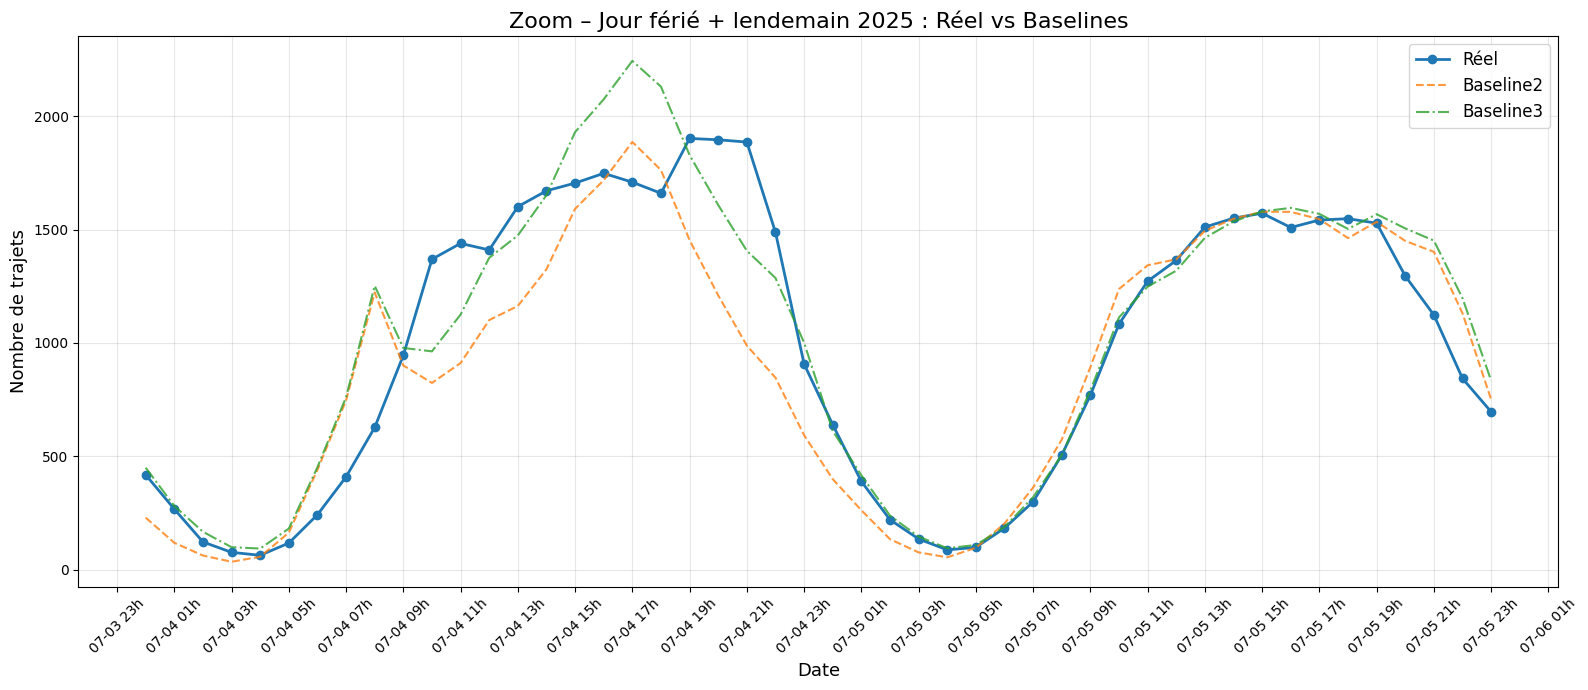

In [171]:
zoom_start = '2025-07-04'  # jour férié US
zoom_end   = '2025-07-05 23:00:00'

test_zoom = df_eval_test.loc[zoom_start:zoom_end]
test_zoom.index = pd.to_datetime(test_zoom.index)

plt.figure(figsize=(16,7))
plt.plot(test_zoom.index, test_zoom['num_rides'], label='Réel', marker='o', linewidth=2)
plt.plot(test_zoom.index, test_zoom['baseline2'], label='Baseline2', linestyle='--', alpha=0.8)
plt.plot(test_zoom.index, test_zoom['baseline3'], label='Baseline3', linestyle='-.', alpha=0.8)

plt.title("Zoom – Jour férié + lendemain 2025 : Réel vs Baselines", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Nombre de trajets", fontsize=13)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Formatter l'axe x heure par heure
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %Hh'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Interprétation – Baseline3
La Baseline 3 combine l’historique H-24, la saisonnalité jour-heure, une inertie locale via la moyenne des 3 dernières heures, ainsi que des facteurs calendaires (week-end et jours fériés).
Elle améliore légèrement la précision par rapport à la Baseline 2 (MAE : 165.33 vs 174.09), en capturant mieux certaines variations ponctuelles.
On observe notamment une meilleure adaptation aux pics atypiques liés aux holidays, même si quelques écarts subsistent lors de variations très abruptes.
Globalement, cette baseline montre qu’une combinaison simple de saisonnalité et d’inertie récente permet d’obtenir une prédiction robuste et directement exploitable opérationnellement.

# Conclusion

**Baseline naïve H-24** → capture tendance et cycles journaliers  
**Baseline2** → ajout saisonnalité et optimisation α → MAE baisse à 174  
**Baseline3** → H24+ saison+rolling 3h+calendrier → MAE = 163, meilleure capture des pics  
Solution robuste, exploitable pour planifier flotte et ressources  
**Limites simples** : pics exceptionnels non prévisibles

In [180]:
results = pd.DataFrame({
    "Model": ["Naive H24", "Baseline2", "Baseline3"],
    "MAE": [mae_naive, mae_test, mae_b3],
    "sMAPE": [smape_naive, smape_test, smape_b3]
})

print(results)

       Model         MAE      sMAPE
0  Naive H24  194.825455  33.879320
1  Baseline2  174.086738  29.220264
2  Baseline3  165.334516  29.930085


In [184]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

requirements = f"""
pandas=={pd.__version__}
numpy=={np.__version__}
matplotlib=={matplotlib.__version__}
scikit-learn=={sklearn.__version__}
"""

with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

print("✅requirements.txt minimal avec versions exactes créé !")

✅ requirements.txt minimal avec versions exactes créé !
